In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

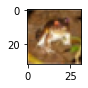

In [ ]:
plot_sample(0)

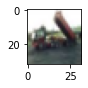

In [ ]:
plot_sample(2)

In [ ]:
classes = ['Aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

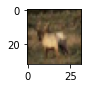

In [ ]:
plot_sample(3)

In [ ]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
classes [y_train[3][0]]

'deer'

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10,dtype = 'float32'
)

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10,dtype = 'float32'
)

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(3000, activation='relu'),
                          keras.layers.Dense(1000, activation='relu'),
                          keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer="SGD",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train_categorical,epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8575 - accuracy: 0.3343
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6541 - accuracy: 0.4154
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5677 - accuracy: 0.4446
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5053 - accuracy: 0.4677
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4561 - accuracy: 0.4872
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4138 - accuracy: 0.5005
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3759 - accuracy: 0.5163
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3394 - accuracy: 0.5268
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3077 - accuracy: 0.5394
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.275

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
np.argmax(model.predict(X_test_scaled )[1])

8

In [ ]:
classes[np.argmax(model.predict(X_test_scaled )[1])]

'ship'

In [ ]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 1.5185 - accuracy: 0.5662


[1.518498182296753, 0.5662000179290771]

In [ ]:
def get_model():
  model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(3000, activation='relu'),
                          keras.layers.Dense(1000, activation='relu'),
                          keras.layers.Dense(10, activation="sigmoid")
  ])

  model.compile(
      optimizer="SGD",
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model


In [ ]:
%%timeit -n1 -r1
gpu = model.fit(X_train_scaled,y_train_categorical,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0844 - accuracy: 0.9821
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0784 - accuracy: 0.9836
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0722 - accuracy: 0.9864
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0657 - accuracy: 0.9880
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0600 - accuracy: 0.9897
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0576 - accuracy: 0.9893
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0511 - accuracy: 0.9916
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0483 - accuracy: 0.9924
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0501 - accuracy: 0.9922
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.041